In this step I imported the dataset from Robinson et al. (2017) as a pickle dile.
I inspected the data and renamed the columns.

In [7]:
import pandas as pd

data = pd.read_pickle('labeled_data.p')
num_entries = len(data)

data.columns = ['count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']
# View the first 5 rows of the data
print(data.head())


ValueError: Length mismatch: Expected axis has 6 elements, new values have 1 elements

In [3]:
import pandas as pd

# Step 1: Load your data
# Replace 'your_file_path.pkl' with the actual path to your .pkl file
# data = pd.read_pickle('your_file_path.pkl')

# Rename columns
data.columns = ['count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']

# Step 2: View the first 5 rows of the data
print(data.head())

# Step 3: Tidy the data
# Handling missing values (if any)
data = data.dropna()  # This removes rows with missing values

# Removing duplicates (if any)
data = data.drop_duplicates()

# Additional data tidying steps can be added here based on your specific needs
# For example, you might want to convert text to lowercase, remove special characters from tweets, etc.



   count  hate_speech  offensive_language  neither class  \
0      3            0                   0        3     2   
1      3            0                   3        0     1   
2      3            0                   3        0     1   
3      3            0                   2        1     1   
4      6            0                   6        0     1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


This Python code snippet demonstrates how to load, preprocess, and clean a dataset containing tweet data using the pandas and re (regular expression) libraries. Here's a breakdown of each part of the code:

1. **Import Libraries**:
   - `import pandas as pd`: Imports the pandas library, a powerful data manipulation and analysis tool, and names it as `pd` for convenience.
   - `import re`: Imports Python's built-in library for regular expressions, which is used for string matching and manipulation.

2. **Loading Data** (commented out):
   - `data = pd.read_pickle('your_file_path.pkl')`: This line, which is commented out, would normally load a dataset from a pickle file (`.pkl`) located at 'your_file_path.pkl'. Pickle files are a way to serialize and save Python objects, like a DataFrame.

3. **Rename Columns**:
   - `data.columns = ['count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']`: This line renames the columns of the DataFrame `data` to the specified names. It assumes that the DataFrame has exactly six columns.

4. **Function to Clean Text Data** (`clean_text`):
   - The function `clean_text` takes a string `text` as input and applies several transformations to clean and standardize it:
     - Converts the text to lowercase.
     - Removes URLs (strings that start with 'http').
     - Removes mentions (strings that start with '@').
     - Removes the hashtag symbol ('#') but keeps the following text.
     - Removes non-alphabetic characters (keeps only letters and spaces).
     - Removes occurrences of 'rt' which usually indicates a retweet.

5. **Apply the Cleaning Function**:
   - `data['tweet'] = data['tweet'].apply(clean_text)`: This line applies the `clean_text` function to each entry in the 'tweet' column of the DataFrame `data`. This is done using the `apply` method, which applies a function along an axis of the DataFrame.

6. **Display the Cleaned Data**:
   - `print(data.head())`: This line prints the first few rows of the cleaned DataFrame to provide a preview of the data.

Overall, the code is meant for preprocessing tweet data, particularly focusing on cleaning and standardizing text data for analysis, such as in natural language processing tasks.




In [4]:
import pandas as pd
import re

# Load your data
# Replace 'your_file_path.pkl' with the actual path to your .pkl file
# data = pd.read_pickle('your_file_path.pkl')

# Rename columns
data.columns = ['count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']

# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags symbol (but keep the text)
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\brt\b', '', text)  # Remove 'rt' indicating a retweet
    return text

# Apply the cleaning function to the tweet column
data['tweet'] = data['tweet'].apply(clean_text)

# Display the cleaned data
print(data.head())




   count  hate_speech  offensive_language  neither class  \
0      3            0                   0        3     2   
1      3            0                   3        0     1   
2      3            0                   3        0     1   
3      3            0                   2        1     1   
4      6            0                   6        0     1   

                                               tweet  
0     as a woman you shouldnt complain about clea...  
1     boy dats coldtyga dwn bad for cuffin dat ho...  
2     dawg   you ever fuck a bitch and she start ...  
3                             she look like a tranny  
4     the shit you hear about me might be true or...  


I saved the cleaned data as a csv file.
I generated a subset of the data containing only offensive language tweets.

In [9]:
# save as csv
data.to_csv('labeled_data_new.csv', index=False)

In [8]:
# generate subset of data  only offensive_language
data_offensive = data[data['offensive_language'] == 1]
data_offensive = data_offensive[['class', 'tweet']]




I generated a wordcloud of the subset of offensive language tweets.

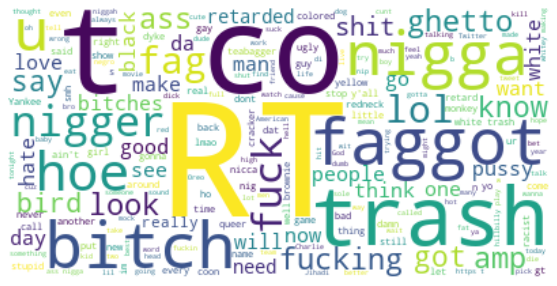

In [9]:
# make a wordcloud of the subset
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into one text
text = ' '.join(tweet for tweet in data_offensive.tweet)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I saved the wordcloud as a png file.

In [10]:
# save plot as png
wordcloud.to_file("wordcloud_offensive.png")
